# Exploratory Data Analysis of Company Sales Data

In [25]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
#reading the Comapny Sales data file
sales_summary = pd.read_csv (r"C:\Users\DELL\Downloads\sales summary.csv")

In [27]:
#Overall view of the company sales data
sales_summary.head()

,fiscal_week_id,store_id,item_id,item_cost_amt,item_qty,sales_amt_no_discount,sales_amt
0,2019-11,7382791459,943157526,134.49,435,4716.74,11272.59
1,2019-11,7382791459,590815741,278.99,384,5040.08,13896.08
2,2019-11,7382791459,7952023441,249.81,356,6933.46,13569.40
3,2019-11,7382791459,8306458294,174.31,424,5748.53,9078.36
4,2019-11,7382791459,5386115794,98.13,461,2710.61,14199.56


In [28]:
#Handling missing values
sales_summary.isnull()

,fiscal_week_id,store_id,item_id,item_cost_amt,item_qty,sales_amt_no_discount,sales_amt
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False


In [29]:
#check for missing values 
sales_summary.isnull().sum()

fiscal_week_id           0
store_id                 0
item_id                  0
item_cost_amt            0
item_qty                 0
sales_amt_no_discount    0
sales_amt                0
dtype: int64

In [30]:
#display a concise summary of the company sales dataframe
sales_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fiscal_week_id         10000 non-null  object 
 1   store_id               10000 non-null  int64  
 2   item_id                10000 non-null  int64  
 3   item_cost_amt          10000 non-null  float64
 4   item_qty               10000 non-null  int64  
 5   sales_amt_no_discount  10000 non-null  float64
 6   sales_amt              10000 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


In [31]:
#convert the fiscal week id column from a string to a datetime format
sales_summary['fiscal_week_id'] = pd.to_datetime(sales_summary['fiscal_week_id'] + '-1', format='%Y-%W-%w')

In [32]:
#define start date and end date variables by converting specific fiscal week variables into datetime objects
start_date = pd.to_datetime('2019-11-1', format='%Y-%W-%w')
end_date = pd.to_datetime('2019-15-1', format='%Y-%W-%w')

In [33]:
#display the updated summary of the company sales dataframe
sales_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fiscal_week_id         10000 non-null  datetime64[ns]
 1   store_id               10000 non-null  int64         
 2   item_id                10000 non-null  int64         
 3   item_cost_amt          10000 non-null  float64       
 4   item_qty               10000 non-null  int64         
 5   sales_amt_no_discount  10000 non-null  float64       
 6   sales_amt              10000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 547.0 KB


In [34]:
#summary statistics of the company sales data
sales_summary.describe()

,fiscal_week_id,store_id,item_id,item_cost_amt,item_qty,sales_amt_no_discount,sales_amt
count,10000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,2019-04-01 00:00:00,5.168806e+09,5.313706e+09,166.581400,398.815500,4765.520699,11420.198973
min,2019-03-18 00:00:00,1.002825e+09,4.006646e+07,47.700000,285.000000,2003.700000,7613.560000
25%,2019-03-25 00:00:00,2.238250e+09,2.566949e+09,105.592500,348.000000,3462.180000,9544.715000
50%,2019-04-01 00:00:00,5.090165e+09,5.626775e+09,158.770000,400.000000,4745.765000,11267.170000
75%,2019-04-08 00:00:00,7.406571e+09,8.263456e+09,221.192500,450.000000,6059.600000,13227.390000
max,2019-04-15 00:00:00,8.994014e+09,9.955717e+09,310.660000,522.000000,7853.810000,15685.080000
std,NaN,2.760873e+09,3.009436e+09,69.161225,59.266737,1532.689772,2108.003787


## Data Analysis of Sales Without Discounts

In [35]:
#filter the data for a specific data range
fiscal_week = sales_summary[(sales_summary['fiscal_week_id'] >= start_date) & (sales_summary['fiscal_week_id'] <= end_date)]

In [36]:
#group and sum sales amount without discounts by fiscal week
weekly_sales = fiscal_week.groupby('fiscal_week_id')['sales_amt_no_discount'].sum()

In [37]:
#reset index to convert the groupby object to a dataframe
weekly_sales = sales_summary.groupby('fiscal_week_id')['sales_amt_no_discount'].sum().reset_index()

In [38]:
#display the weekly sales without discounts
weekly_sales

,fiscal_week_id,sales_amt_no_discount
0,2019-03-18,9534909.13
1,2019-03-25,9526990.64
2,2019-04-01,9528230.83
3,2019-04-08,9536440.18
4,2019-04-15,9528636.21


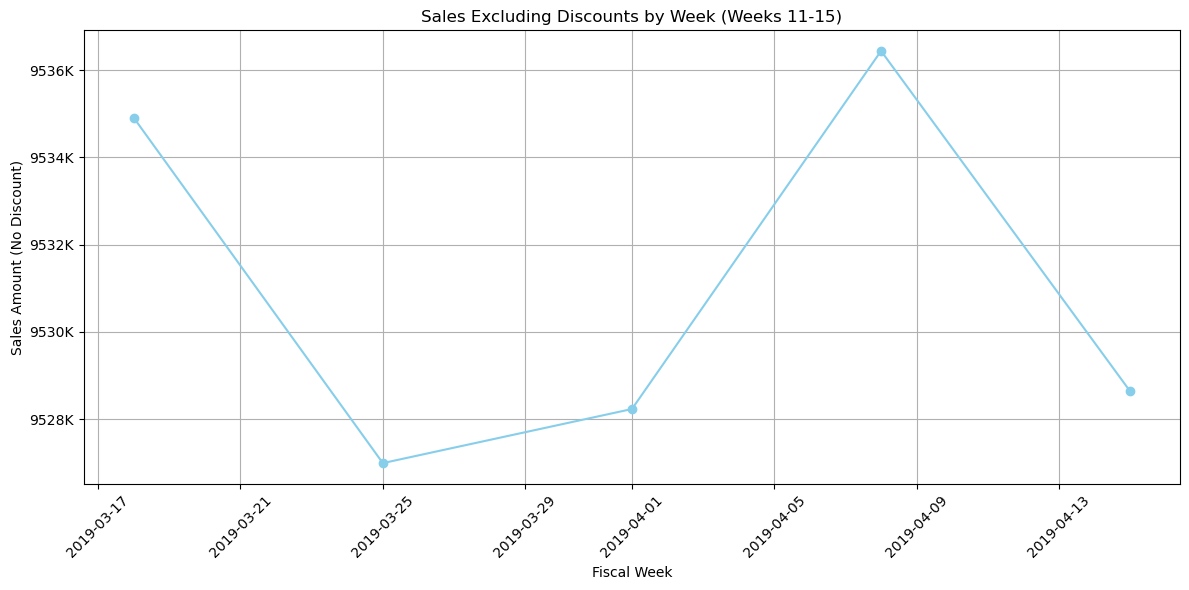

In [39]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plot sales excluding discounts by week
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['fiscal_week_id'], weekly_sales['sales_amt_no_discount'], marker='o', linestyle='-', color='skyblue')
plt.title('Sales Excluding Discounts by Week (Weeks 11-15)')
plt.xlabel('Fiscal Week')
plt.ylabel('Sales Amount (No Discount)')

# Format y-axis labels in thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1000:.0f}K'))

#rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
#sort weekly sales by fiscal week
weekly_sales = weekly_sales.sort_values(by='fiscal_week_id')

# Calculate percentage change in sales without discounts
weekly_sales['percentage_change'] = weekly_sales['sales_amt_no_discount'].pct_change() * 100

# Fill NaN values for the first row with 0 or another appropriate value (due to lack of prior data for the first week)
weekly_sales['percentage_change'] = weekly_sales['percentage_change'].fillna(0)

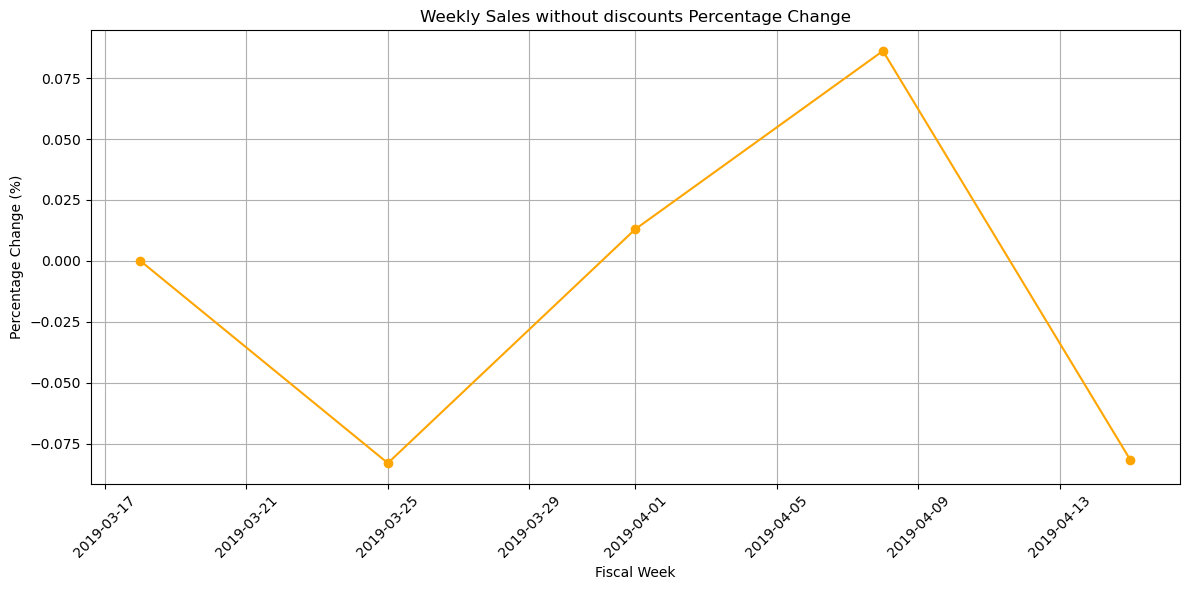

In [41]:
#plot percentage change in sales without discounts by week
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['fiscal_week_id'], weekly_sales['percentage_change'], marker='o', linestyle='-', color='orange')
plt.title('Weekly Sales without discounts Percentage Change')
plt.xlabel('Fiscal Week')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
print(weekly_sales)

  fiscal_week_id  sales_amt_no_discount  percentage_change
0     2019-03-18             9534909.13           0.000000
1     2019-03-25             9526990.64          -0.083047
2     2019-04-01             9528230.83           0.013018
3     2019-04-08             9536440.18           0.086158
4     2019-04-15             9528636.21          -0.081833


## Data Analysis of Sales With Discounts

In [43]:
#group and sum sales amounts with discounts by fiscal week
weekly_sales = fiscal_week.groupby('fiscal_week_id')['sales_amt'].sum()

In [44]:
#reset index to convert the groupby object to a dataframe
weekly_sales = sales_summary.groupby('fiscal_week_id')['sales_amt'].sum().reset_index()

In [45]:
#display the weekly sales with discounts
weekly_sales

,fiscal_week_id,sales_amt
0,2019-03-18,22841083.14
1,2019-03-25,22875757.26
2,2019-04-01,22839796.72
3,2019-04-08,22836061.59
4,2019-04-15,22809291.02


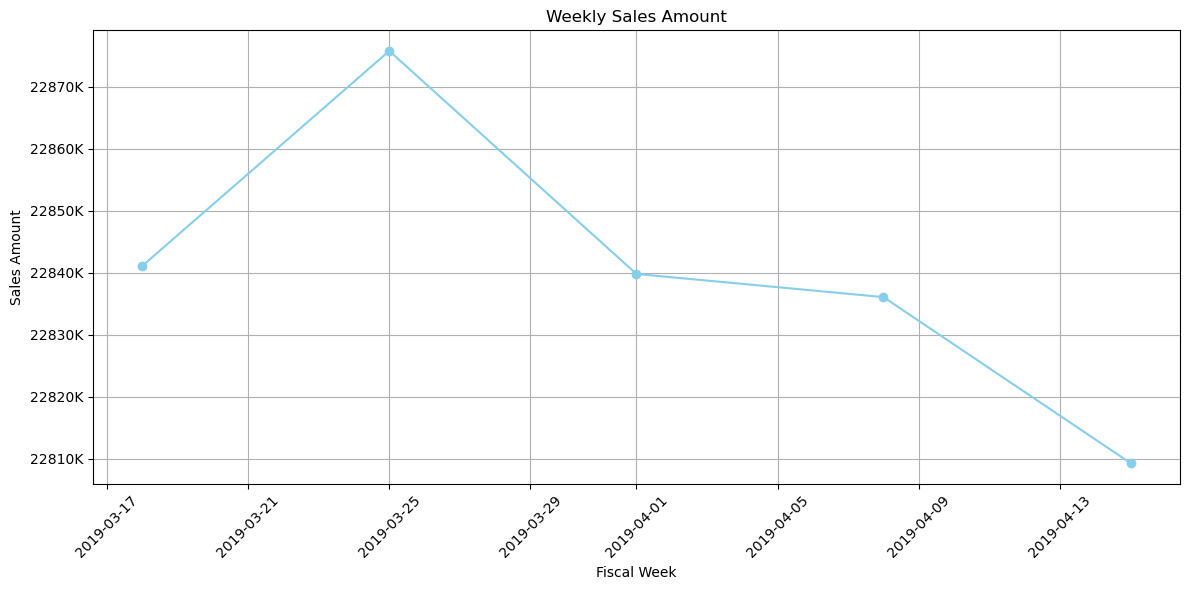

In [46]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plot weekly sales with discounts amount
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['fiscal_week_id'], weekly_sales['sales_amt'], marker='o', linestyle='-', color='skyblue')
plt.title('Weekly Sales Amount')
plt.xlabel('Fiscal Week')
plt.ylabel('Sales Amount')

# Format y-axis labels in thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1000:.0f}K'))

#rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
#sort weekly sales by fiscal week
weekly_sales = weekly_sales.sort_values(by='fiscal_week_id')

# Calculate percentage change in sales with discounts 
weekly_sales['percentage_change'] = weekly_sales['sales_amt'].pct_change() * 100

# Fill NaN values for the first row with 0 or another appropriate value (due to lack of prior data for the first week)
weekly_sales['percentage_change'] = weekly_sales['percentage_change'].fillna(0)

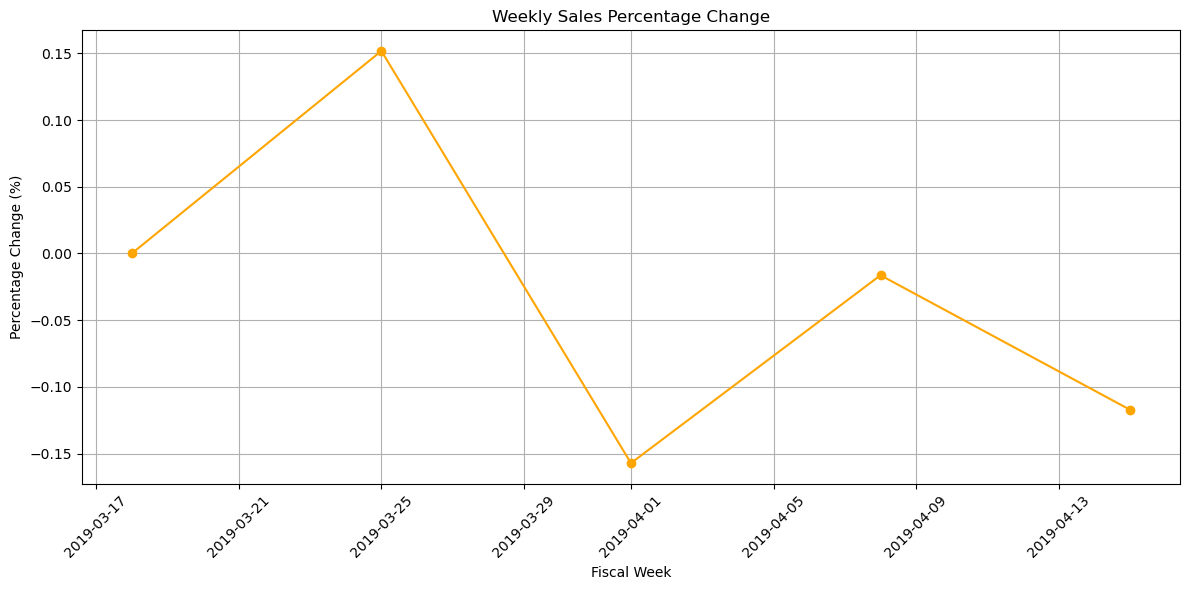

In [48]:
import matplotlib.pyplot as plt

#plot percentage change in sales with discounts by week
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['fiscal_week_id'], weekly_sales['percentage_change'], marker='o', linestyle='-', color='orange')
plt.title('Weekly Sales Percentage Change')
plt.xlabel('Fiscal Week')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
print(weekly_sales)

  fiscal_week_id    sales_amt  percentage_change
0     2019-03-18  22841083.14           0.000000
1     2019-03-25  22875757.26           0.151806
2     2019-04-01  22839796.72          -0.157199
3     2019-04-08  22836061.59          -0.016354
4     2019-04-15  22809291.02          -0.117229


## Data Analysis of Weekly Costs

In [50]:
#group and sum item costs by fiscal week
weekly_costs = fiscal_week.groupby('fiscal_week_id')['item_cost_amt'].sum()

In [51]:
#reset index to convert the groupby object to a dataframe
weekly_costs = sales_summary.groupby('fiscal_week_id')['item_cost_amt'].sum().reset_index()

In [52]:
#display the weekly item costs
weekly_costs

,fiscal_week_id,item_cost_amt
0,2019-03-18,333127.38
1,2019-03-25,333039.54
2,2019-04-01,333033.11
3,2019-04-08,333242.24
4,2019-04-15,333371.73


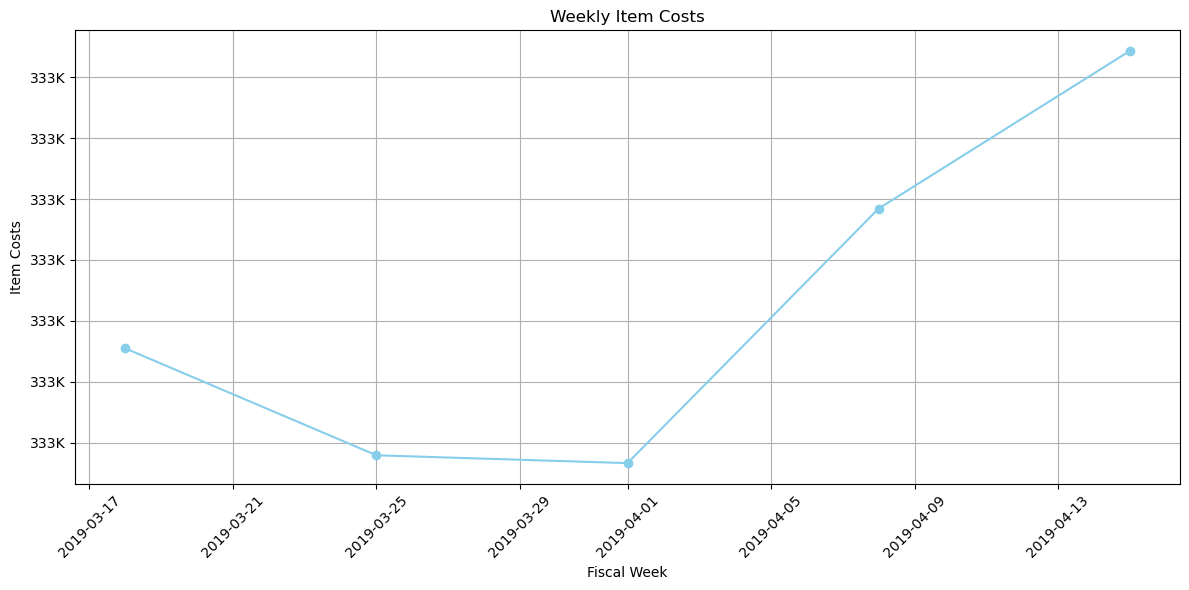

In [53]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plot weekly item costs
plt.figure(figsize=(12, 6))
plt.plot(weekly_costs['fiscal_week_id'], weekly_costs['item_cost_amt'], marker='o', linestyle='-', color='skyblue')
plt.title('Weekly Item Costs')
plt.xlabel('Fiscal Week')
plt.ylabel('Item Costs')

# Format y-axis labels in thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1000:.0f}K'))

#rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Calculation of Profits with and without discounts

In [54]:
#group and sum item quantities by fiscal week
weekly_item_qty = fiscal_week.groupby('fiscal_week_id')['item_qty'].sum()

In [55]:
#reset index to convert the groupby object to a dataframe
weekly_item_qty = sales_summary.groupby('fiscal_week_id')['item_qty'].sum().reset_index()

In [56]:
#display the weekly item quantities
weekly_item_qty

,fiscal_week_id,item_qty
0,2019-03-18,797237
1,2019-03-25,797918
2,2019-04-01,797304
3,2019-04-08,797837
4,2019-04-15,797859


In [57]:
#Calculate total costs and profits with and without discounts
sales_summary['total_cost'] = sales_summary['item_cost_amt']* sales_summary['item_qty']
sales_summary['profit_no_discount'] = sales_summary['sales_amt_no_discount'] - sales_summary['total_cost']
sales_summary['profit_with_discount'] = sales_summary['sales_amt'] - sales_summary['total_cost']

#display profits with and without discounts
print(sales_summary[['fiscal_week_id', 'store_id', 'item_id', 'profit_no_discount', 'profit_with_discount']])

     fiscal_week_id    store_id     item_id  profit_no_discount  \
0        2019-03-18  7382791459   943157526           -53786.41   
1        2019-03-18  7382791459   590815741          -102092.08   
2        2019-03-18  7382791459  7952023441           -81998.90   
3        2019-03-18  7382791459  8306458294           -68158.91   
4        2019-03-18  7382791459  5386115794           -42527.32   
...             ...         ...         ...                 ...   
9995     2019-04-15  1002825197  9257203786           -76820.73   
9996     2019-04-15  1002825197  7705756325           -30857.71   
9997     2019-04-15  1002825197  1076975726           -73814.28   
9998     2019-04-15  1002825197  7960094117           -16232.02   
9999     2019-04-15  1002825197  3646391743           -30399.12   

      profit_with_discount  
0                -47230.56  
1                -93236.08  
2                -75362.96  
3                -64829.08  
4                -31038.37  
...                  

In [58]:
#aggregate total profits with and without discounts by fiscal week
weekly_profit = sales_summary.groupby('fiscal_week_id').agg({
    'profit_no_discount':'sum',
    'profit_with_discount':'sum'
}).reset_index()

In [59]:
#display the aggregated weekly profits with and without discounts
weekly_profit

,fiscal_week_id,profit_no_discount,profit_with_discount
0,2019-03-18,-1.219070e+08,-1.086008e+08
1,2019-03-25,-1.220666e+08,-1.087178e+08
2,2019-04-01,-1.218961e+08,-1.085846e+08
3,2019-04-08,-1.219502e+08,-1.086506e+08
4,2019-04-15,-1.221597e+08,-1.088790e+08


## Calculation of Price Elasticity

In [60]:
#calculate the percentage change in item costs and quantities
sales_summary['price_change'] = sales_summary['item_cost_amt'].pct_change()
sales_summary['qty_change'] = sales_summary['item_qty'].pct_change()

#calculate price elasticity of demand
sales_summary['elasticity'] = sales_summary['qty_change'] / sales_summary['price_change']

#display first few records with elasticity
sales_summary.head()

,fiscal_week_id,store_id,item_id,item_cost_amt,item_qty,sales_amt_no_discount,sales_amt,total_cost,profit_no_discount,profit_with_discount,price_change,qty_change,elasticity
0,2019-03-18,7382791459,943157526,134.49,435,4716.74,11272.59,58503.15,-53786.41,-47230.56,NaN,NaN,NaN
1,2019-03-18,7382791459,590815741,278.99,384,5040.08,13896.08,107132.16,-102092.08,-93236.08,1.074429,-0.117241,-0.109120
2,2019-03-18,7382791459,7952023441,249.81,356,6933.46,13569.40,88932.36,-81998.90,-75362.96,-0.104592,-0.072917,0.697156
3,2019-03-18,7382791459,8306458294,174.31,424,5748.53,9078.36,73907.44,-68158.91,-64829.08,-0.302230,0.191011,-0.632007
4,2019-03-18,7382791459,5386115794,98.13,461,2710.61,14199.56,45237.93,-42527.32,-31038.37,-0.437037,0.087264,-0.199672


In [61]:
sales_summary['elasticity'].mean()

inf

In [62]:
#calculate the average price elasticity, excluding infinity and NAN values
sales_summary.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
sales_summary.dropna(subset=['elasticity'], inplace=True)
average_elasticity = sales_summary['elasticity'].mean()

#print the average
print(average_elasticity)

-0.2881742350504848


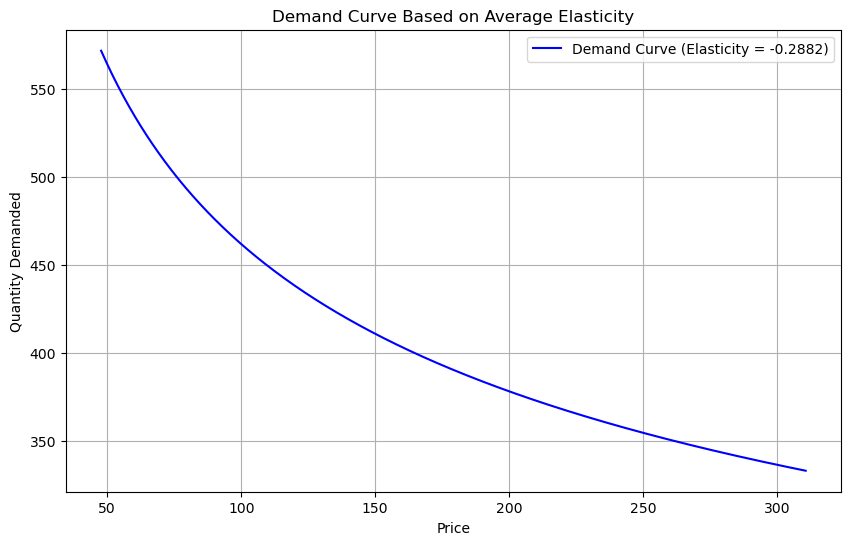

In [63]:
import numpy as np
import matplotlib.pyplot as plt

#generate a range of prices based on the minimum and maximum item cost amounts in the dataset
price_range = np.linspace(sales_summary['item_cost_amt'].min(), sales_summary['item_cost_amt'].max(), 500)

#calculate the coefficient (A) for the demand curve based on average quantity sold, average item cost, and average elasticity
A = sales_summary['item_qty'].mean() / (sales_summary['item_cost_amt'].mean() ** average_elasticity)

#predict the quantity demanded for each price in the price range using the demand curve formula
predicted_qty = A * price_range ** average_elasticity

#plot the demand curve based on the average elasticity 
plt.figure(figsize=(10, 6))
plt.plot(price_range, predicted_qty, color='blue', label=f'Demand Curve (Elasticity = {average_elasticity:.4f})')

plt.title('Demand Curve Based on Average Elasticity')
plt.xlabel('Price')
plt.ylabel('Quantity Demanded')
plt.grid(True)
plt.legend()

plt.show()